In [ ]:
# Import library yang dibutuhkan
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

In [ ]:
# Membaca dataset dari file
datasetPath = "Dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter=" ")

In [ ]:
# Mendefinisikan parameter k-means klustering
k = 2 #jumlah klaster yang diinginkan
iterationCounter = 0 #counter untuk iterasi
input = dataset #input data

In [ ]:
# Fungsi untuk inisialisasi/menentukan titik pusat kluster (secara random)
def initCentroid(dataIn, k):
    result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
    return result

In [ ]:
#Fungsi untuk plot hasil klaster per iterasi
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color =iter(cm.rainbow(np.linspace(0, 1, n))) #cm.rainbow sbg warna
    plt.figure("result")
    plt.clf()
    plt.title("Iteration=" + iteration)
    marker = itertools.cycle(('.', '*', '^', 'x', '+'))
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
                    marker=marker.__next__(), s=100, c=col, label="klaster-" + str(i + 1))
    for i in range(n):
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__(),
        c=col, label="centroid-" + str(i + 1))
    if(converged == 0): #jika hasil iterasi sekarang dengan sebelumnya sama maka lakukan ini
        plt.legend()
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if(converged == 1):
        plt.legend()
        plt.show(block=True)

In [ ]:
# Fungsi utama algoritma k-means
def kMeans(data, centroidInit):
    nCluster = k #Banyaknya Klaster
    global iterationCounter
    centroidInit = np.matrix(centroidInit)
    #Looping hingga Converged
    while(True):
          iterationCounter +=1
          euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
          #Ulangi proses untuk semua kluster
          for i in range(0, nCluster):
              centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0], axis=0)
              deltaMatrix = abs(np.subtract(data,centroidRepeated))
              #Hitung jarak Euclidean
              euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
              euclideanMatrixAllCluster = \
                  np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)
          #Tempatkan data ke klaster yang jarak Euclideannya paling dekat
          clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
          listClusterMember = [[] for i in range(k)]
          for i in range(0, data.shape[0]): #Assign data to cluster regarding cluster matrix
              listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])
          #Hitung titik pusat kluster terbaru
          newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
          for i in range(0,nCluster):
              memberCluster = np.asmatrix(listClusterMember[i])
              centroidCluster = memberCluster.mean(axis=0)
              newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
          print("iter: ", iterationCounter)
          print("centroid: ", newCentroid)
          #Break dari loop jika sudah konvergen
          if((centroidInit == newCentroid).all()):
              break 
          # Update titik pusat klaster dengan nilai yang baru
          centroidInit = newCentroid
          # Plot hasil klaster per iterasi
          plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
          time.sleep(1) #Diberi jeda 1 detik agar hasil plot klaster nyaman dilihat
    return listClusterMember, centroidInit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument o

iter:  3
centroid:  [[-0.28472685 -2.16147037]
 [-0.6883      9.58956053]]


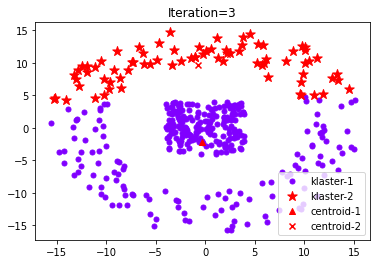

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  4
centroid:  [[-0.30304502 -2.41640836]
 [-0.56534045  8.76396854]]


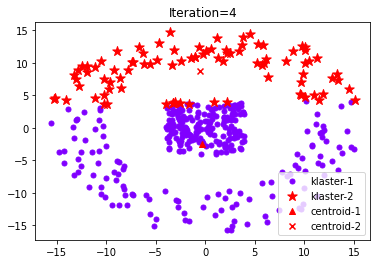

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  5
centroid:  [[-0.36678711 -2.90660836]
 [-0.34773805  7.63439646]]


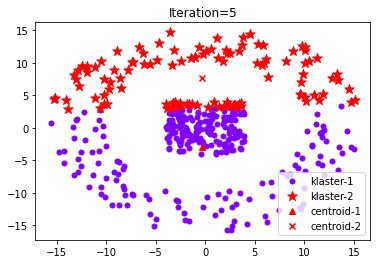

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  6
centroid:  [[-0.36284394 -3.39934583]
 [-0.35861397  6.80821691]]


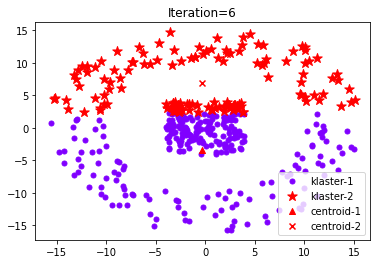

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  7
centroid:  [[-0.4607248  -3.79884797]
 [-0.20275325  6.25329091]]


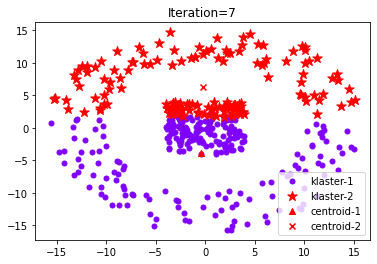

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  8
centroid:  [[-0.48115368 -4.13882165]
 [-0.19772663  5.82578698]]


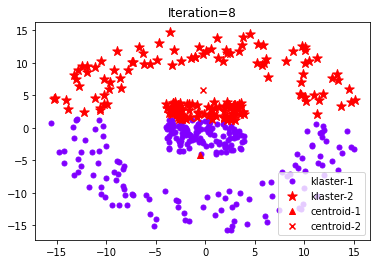

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  9
centroid:  [[-0.33372673 -4.47545668]
 [-0.39422732  5.46264645]]


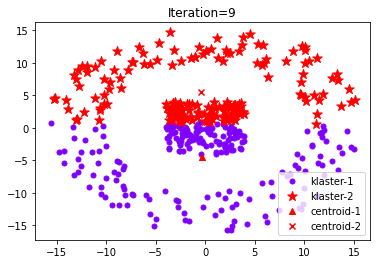

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  10
centroid:  [[-0.2164029  -4.72015797]
 [-0.51692694  5.21017047]]


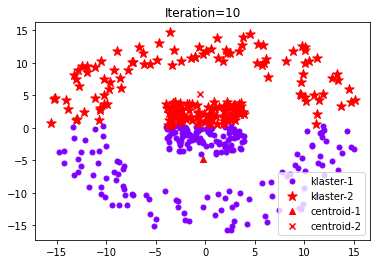

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  11
centroid:  [[-0.05938109 -4.87027711]
 [-0.66646583  5.06239146]]


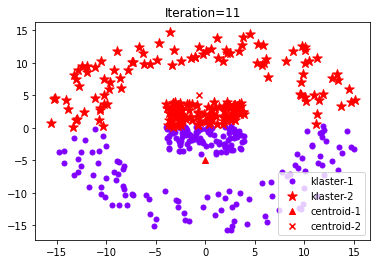

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  12
centroid:  [[ 0.11036943 -5.07312228]
 [-0.80127343  4.86764638]]


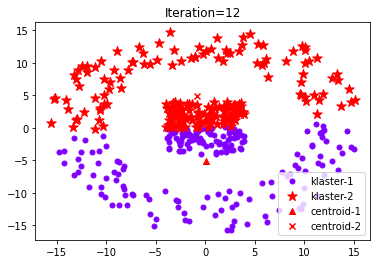

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  13
centroid:  [[ 0.19008128 -5.23201497]
 [-0.84557512  4.72712207]]


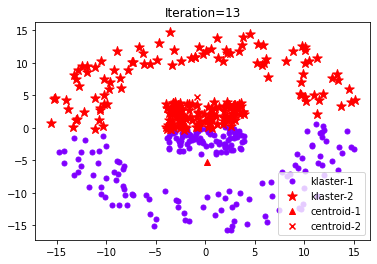

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  14
centroid:  [[ 0.25324066 -5.36651813]
 [-0.87455092  4.61099312]]


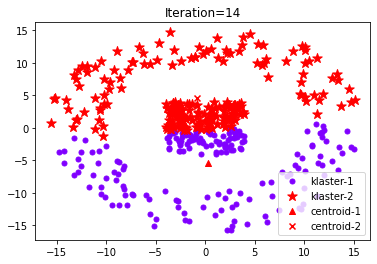

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  15
centroid:  [[ 0.34647722 -5.41375889]
 [-0.94058273  4.55894   ]]


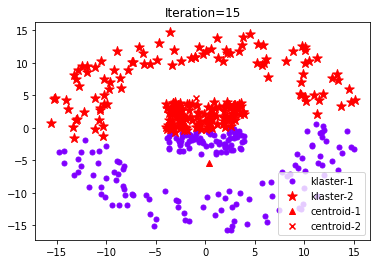

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  16
centroid:  [[ 0.4720017  -5.51386307]
 [-1.01622589  4.45950937]]


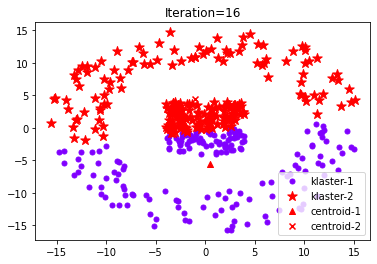

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  17
centroid:  [[ 0.48695287 -5.57086034]
 [-1.01456681  4.4151323 ]]


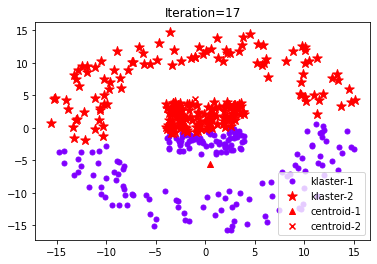

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  18
centroid:  [[ 0.4921193  -5.66026959]
 [-0.99875415  4.35107555]]


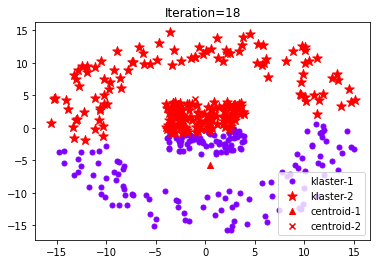

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

iter:  19
centroid:  [[ 0.4921193  -5.66026959]
 [-0.99875415  4.35107555]]


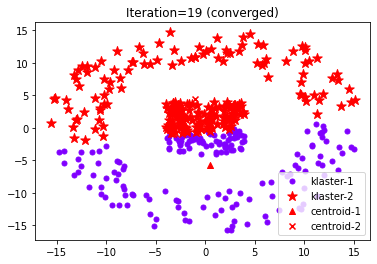

In [ ]:
#Panggil fungsi inisialisasi klaster
centroidInit = initCentroid(input, k)
#Panggil fungsi k-means
clusterResults, centroid = kMeans(input, centroidInit)
#Plot hasil final klaster setelah konvergen
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged)", 1)